<a href="https://colab.research.google.com/github/Thamizhi/Data-Analytics/blob/master/Multi-dimensionalScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

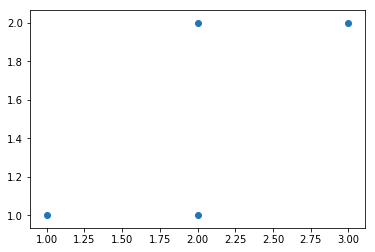

In [0]:
import matplotlib.pyplot as plt
data_pts = np.array([[1,1],[2,1],[2,2],[3,2]])

x_pts = data_pts[:,0]
y_pts = data_pts[:,1]
x_mean=np.average(x_pts)
y_mean=np.average(y_pts)
data_mean = np.array([[x_mean,y_mean],[x_mean,y_mean],[x_mean,y_mean],[x_mean,y_mean]])
x_matrix = data_pts - data_mean #mean_subtracted
plt.scatter(x_pts,y_pts)

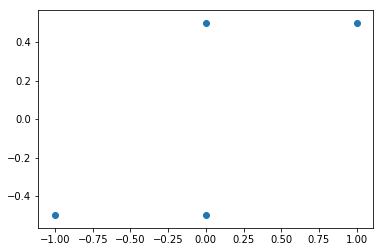

In [0]:
import numpy as np
x_transpose = []
#x_matrix = [[-1,-0.5],[0,-0.5],[0,0.5],[1,0.5]]
#x_matrix_array = np.array([[-1,-0.5],[0,-0.5],[0,0.5],[1,0.5]])
x_transpose = np.transpose(x_matrix)
x_pts_ms = x_matrix[:,0]
y_pts_ms = x_matrix[:,1]
plt.scatter(x_pts_ms,y_pts_ms)



In [0]:
xx_trans = np.dot(x_matrix,x_transpose)
xx_trans

array([[ 1.25,  0.25, -0.25, -1.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-1.25, -0.25,  0.25,  1.25]])

In [0]:
value,vector = np.linalg.eig(xx_trans)


In [0]:
eigen_value = value[0]
eigen_vector = vector[:,0]

array([-0.68819096, -0.16245985,  0.16245985,  0.68819096])

In [0]:
sqrt_eigenval = np.sqrt(eigen_value)
mds_projection = eigen_vector*sqrt_eigenval
mds_projection

array([-1.11351636, -0.26286556,  0.26286556,  1.11351636])

In [0]:
#distance matrix of y 
from sklearn.metrics.pairwise import euclidean_distances
dist_y = euclidean_distances(mds_projection.reshape(-1,1),mds_projection.reshape(-1,1))

In [0]:
#distance matrix of x
dist_x = euclidean_distances(x_matrix,x_matrix)
dist_x

array([[0.        , 1.        , 1.41421356, 2.23606798],
       [1.        , 0.        , 1.        , 1.41421356],
       [1.41421356, 1.        , 0.        , 1.        ],
       [2.23606798, 1.41421356, 1.        , 0.        ]])

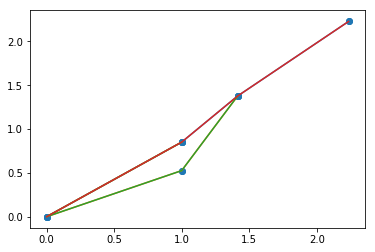

In [0]:
#shepherds plot
plt.scatter(dist_x,dist_y)
plt.plot(dist_x,dist_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


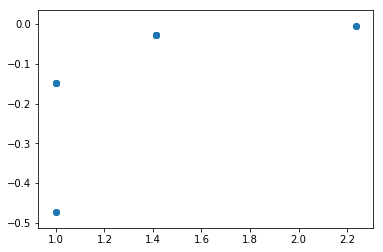

In [0]:
#error plot
delta_dist = (dist_y-dist_x)/dist_x
plt.scatter(dist_x,delta_dist)